# SAT & ACT Data: Analyzing test scores and participation rates from 2017-18

## Problem Statement

The SAT is the most taken college admission test$^{1}$, with 2,136,539 students$^{2}$ from the class of 2018 taking the test. Out of 3,651,200 total students in the class of 2018 in the US$^{3}$, that's 59% of graduating seniors who took the SAT. Does the SAT need to focus on increasing its participation rates? Or, given that over a majority of high school students are now taking this test as a way to get into college, how are they performing? Is the rise in SAT test-takers contributing to the rise of students going to college?  

Citations:
<br>
1: https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever
<br>
2: https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html
<br>
3: https://nces.ed.gov/programs/digest/d17/tables/dt17_219.10.asp

### Contents:
- [Description of the 2017 ACT and SAT data columns](#Description-of-the-2017-ACT-and-SAT-data-columns)
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [External Research](#External-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
***

## Description of the 2017 ACT and SAT data columns

**SAT 2017 & 2018 data**
<br>
The SAT 2017 dataset showcases the participation rates of high school students in the class of 2017 from all 50 states and the District of Columbia who took the SAT and how they performed on the SAT. The columns of the SAT 2017 dataset are:
- State: Names of US states and the District of Columbia 
- Participation: The percentage of 2017 graduating seniors who took the SAT
- Evidence-Based Reading and Writing (ERW): The mean score of this particular category of the SAT
- Math: The mean score of this particular category of the SAT
- Total: The sum of the mean scores of ERW and Math

**ACT 2017 & 2018 data**
<br>
The ACT 2017 dataset showcases the participation rates of high school students in the class of 2018 from all 50 states and the District of Columbia who took the ACT and how they performed on the ACT. The columns of the ACT 2017 dataset are:
- State: Names of US states and the District of Columbia 
- Participation: The percentage of 2018 graduating seniors who took the ACT
- English: The mean score of this particular category of the ACT
- Math: The mean score of this particular category of the ACT
- Reading: The mean score of this particular category of the ACT
- Science: The mean score of this particular category of the ACT
- Composite: The mean score of all the categories mentioned above.

Note: the ACT 2018 dataset contains only "State," "Participation," and "Composite" columns. 

#### Load Packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import folium
import os
from IPython.display import HTML, display
from IPython.display import Image

#!pip install folium

#%load_ext folium_magic
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 2017 Data Import and Cleaning

### 1. SAT & ACT  Data Import

In [2]:
# Import csv into Pandas DataFrame and save into new variables

sat_2017 = pd.read_csv('./data/sat_2017.csv')
act_2017 = pd.read_csv('./data/act_2017.csv')

### 2a. Display Data: SAT 2017


In [3]:
# The first ten rows of sat_2017

sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


### 2b. Display Data: ACT 2017

In [4]:
#The first ten rows of act_2017

act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


### 3. Datatypes


In [5]:
# Datatypes of sat_2017

sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [6]:
# Datatypes of act_2017

act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

### 4a. Stating the errors in the data.

In the sat_2017 dataset, the "Participation" values are percentages, but they are processing as strings. In the act_2017 dataset, the "Participation" values are percentages, but they are also processing as strings. Also, the "Composite" score should be a float, but it is processing as a string.

### 4b. Fixing incorrect datatypes in SAT 2017 data.

In [7]:
# A function to convert percentage strings to floats. 

def convert_percent_to_float(df, column_name):
    df[column_name] = df[column_name].map(lambda par_cell: par_cell.replace('%', '')) # Remove percentage sign 
    df[column_name] = df[column_name].astype(float)                                   # Convert string to float
    df[column_name] = df[column_name].map(lambda par_cell: par_cell/100)              # Divide number by 100
    print(df[column_name].dtypes)                                                     # Print column dtype to ensure the change has been made.
    return (df[column_name].head())                                                   # Return column head to check data.



In [8]:
# Calling the function to turn Percentage into float values 

convert_percent_to_float(sat_2017, 'Participation')

float64


0    0.05
1    0.38
2    0.30
3    0.03
4    0.53
Name: Participation, dtype: float64

### 4c. Fixing incorrect datatypes in ACT 2017 data.

In [9]:
# Convert percentage strings to floats.

convert_percent_to_float(act_2017, 'Participation')

float64


0    0.60
1    1.00
2    0.65
3    0.62
4    1.00
Name: Participation, dtype: float64

In [10]:
# act_2017 composite scores are strings because one value contains a letter: "20.2x"

# Remove 'x'
act_2017['Composite'] = act_2017['Composite'].map(lambda com_cell: com_cell.replace('x',''))

# Convert column to float
act_2017['Composite'] = act_2017['Composite'].astype(float)

### 4d. Checking the Min/Max to ensure all values are within range.

**Checking the Min/Max Values in SAT 2017**: The range of scores for the [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) Math and ERW sections is 200-800. 

In [11]:
#Minimum values in the sat_2017 dataset. 

print(sat_2017.min())

State                                 Alabama
Participation                            0.02
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object


In [12]:
#Maximum values in the sat_2017 dataset. 

print(sat_2017.max())

State                                 Wyoming
Participation                               1
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object


After reviewing the min and max for the sat_2017 dataset, there appears to be an error: 
- The minimum value for "Math" is 52, which is below the minimum value in the range 200-800

In [13]:
sat_2017.sort_values(['Math']).head(1)

# The lowest value in Math, 52, needs to be changed. 
# Subtract the Writing score from the Total to find the real value of Math, which is 524.

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,0.69,536,52,1060


In [14]:
# Find the row and column where the number needs to change, and assign new number. 

sat_2017.loc[20, 'Math'] = 524

In [15]:
# Check to see if the number was replaced. 

sat_2017['Math'][20]

524

**Checking the Min/Max Values in ACT 2017**: The range of scores for the [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows) for all categories is 1-36.

In [16]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [17]:
#Minimum values in the act_2017 dataset. 

print(act_2017.min())

State            Alabama
Participation       0.08
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object


In [18]:
#Maximum values in the act_2017 dataset. 

print(act_2017.max())

State            Wyoming
Participation          1
English             25.5
Math                25.3
Reading               26
Science             24.9
Composite           25.5
dtype: object


The minimum and maximum values in the ACT 2017 dataset appear to be within range. 

### 4e. Checking that the number of rows in each dataset are aligned. 

There is one extra row in ACT.

In [19]:
# The 52 rows in act_2017 are attributed to all 50 US states, the District of Columbia, and 'National'.

act_2017_row, act_2017_col = act_2017.shape
print(("Number of rows in ACT 2017: {}.").format(act_2017_row))
# print(list(act_2017['State']))

Number of rows in ACT 2017: 52.


In [20]:
# The 51 rows in sat_2017 are attributed to all 50 US states and the District of Columbia.

sat_2017_row, sat_2017_col = sat_2017.shape
print(("Number of rows in SAT 2017: {}.").format(sat_2017_row))
# print(list(sat_2017['State']))

Number of rows in SAT 2017: 51.


In [21]:
# Remove the 'National' row in ACT 2017 dataset, which is in the 0th row.

act_2017.drop(index=0, inplace=True)

In [22]:
# Check the number of rows, columns to ensure that the row was dropped and there are 51 rows.

act_2017.shape

(51, 7)

### **5. Preview the data after errors have been fixed.**

In [23]:
#The first 10 rows of the SAT 2017 dataset.

sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201
6,Connecticut,1.00,530,512,1041
7,Delaware,1.00,503,492,996
8,District of Columbia,1.00,482,468,950
9,Florida,0.83,520,497,1017


In [24]:
#The first 10 rows of the ACT 2017 dataset.

act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2
10,Florida,0.73,19.0,19.4,21.0,19.4,19.8


### 6. Rename Columns

#### SAT 2017 Column Renaming

In [25]:
# Create a dictionary to change names, and specify test type and year. 

sat_new_columns_dict = {'State':'state',
                        'Participation': 'sat_participation_17',
                        'Evidence-Based Reading and Writing': 'sat_ewb_17',
                        'Math': 'sat_math_17',
                        'Total': 'sat_total_17'}

sat_2017.rename(columns=sat_new_columns_dict, inplace=True)

In [26]:
# Call the columns again to ensure all changes were made. 

sat_2017.columns

Index(['state', 'sat_participation_17', 'sat_ewb_17', 'sat_math_17',
       'sat_total_17'],
      dtype='object')

#### ACT 2017 Column Renaming

In [27]:
# Call ACT 2017 column names for reference.

act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [28]:
# Create a dictionary to change names, and specify test type and year. 

act_new_columns_dict = {
        'State':'state',
        'Participation': 'act_participation_17',
        'English': 'act_english_17',
        'Math': 'act_math_17',
        'Reading': 'act_reading_17',
        'Science': 'act_science_17',
        'Composite': 'act_composite_17'
        
    }

act_2017.rename(columns=act_new_columns_dict, inplace=True)

In [29]:
# Call the columns again to ensure all changes were made. 

act_2017.columns

Index(['state', 'act_participation_17', 'act_english_17', 'act_math_17',
       'act_reading_17', 'act_science_17', 'act_composite_17'],
      dtype='object')

### 7. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [30]:
# Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. 

combined_2017_csv = pd.merge(sat_2017, act_2017, on='state')


### 8. Cleaned and merged data for SAT 2017 and ACT 2017.

In [31]:
# The first five rows of the merged dataset.

print(combined_2017_csv.shape)
combined_2017_csv.head()

(51, 11)


,state,sat_participation_17,sat_ewb_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [32]:
# Create combined_2017.csv file 

combined_2017_csv.to_csv('./data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

### 9. SAT & ACT  Data Import

In [33]:
# Import csv into Pandas DataFrame and save into new variables

sat_2018 = pd.read_csv('./data/sat_2018.csv')
act_2018 = pd.read_csv('./data/act_2018.csv')

### 10a. Display Data: SAT 2018

In [34]:
# The first ten rows of sat_2018

sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Minnesota,4%,643,655,1298
1,Wisconsin,3%,641,653,1294
2,North Dakota,2%,640,643,1283
3,Iowa,3%,634,631,1265
4,Kansas,4%,633,631,1265
5,Missouri,4%,633,629,1262
6,Wyoming,3%,633,625,1257
7,Nebraska,3%,629,623,1252
8,Kentucky,4%,630,618,1248
9,South Dakota,3%,622,618,1240


### 10b. Display Data: ACT 2018

In [35]:
#The first ten rows of act_2018

act_2018.head(10)

,State,Participation,Composite
0,Connecticut,26%,25.6
1,Massachusetts,25%,25.5
2,New Hampshire,16%,25.1
3,New York,27%,24.5
4,Michigan,22%,24.4
5,Rhode Island,15%,24.2
6,Vermont,24%,24.1
7,Maine,7%,24.0
8,Colorado,30%,23.9
9,Illinois,43%,23.9


### 12. Datatypes

In [36]:
# Datatypes of sat_2018

sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [37]:
# Datatypes of act_2018

act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

### 13a. Stating the errors in the data.

In the sat_2018 dataset, the "Participation" values are percentages, but they are processing as strings. In the act_2018 dataset, the "Participation" values are percentages, but they are also processing as strings. 

### 13b. Fixing incorrect datatypes in SAT 2018 data.

In [38]:
# A function to convert percentage strings to floats. 

# Calling the function to turn Percentage into float values 

convert_percent_to_float(sat_2018, 'Participation')

float64


0    0.04
1    0.03
2    0.02
3    0.03
4    0.04
Name: Participation, dtype: float64

In [39]:
# Checking the Participation column to ensure all numbers are now floats. 

sat_2018['Participation'].head()

0    0.04
1    0.03
2    0.02
3    0.03
4    0.04
Name: Participation, dtype: float64

In [40]:
# Check sat_2018 dtypes to ensure all datatypes are correct. 

sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

### 13c. Fixing incorrect datatypes in ACT 2018 data.

In [41]:
# Convert percentage strings to floats.

convert_percent_to_float(act_2018, 'Participation')

float64


0    0.26
1    0.25
2    0.16
3    0.27
4    0.22
Name: Participation, dtype: float64

In [42]:
# Check act_2018 dtypes to ensure all datatypes are correct. 

act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

### 13d. Checking the Min/Max to ensure all values are within range.
**Checking the Min/Max Values in SAT 2018**: The range of scores for the [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) Math and ERW sections is 200-800. 

In [43]:
#Minimum values in the sat_2018 dataset. 

print(sat_2018.min())

State                                 Alabama
Participation                            0.02
Evidence-Based Reading and Writing        480
Math                                      480
Total                                     977
dtype: object


In [44]:
#Maximum values in the sat_2018 dataset. 

print(sat_2018.max())

State                                 Wyoming
Participation                               1
Evidence-Based Reading and Writing        643
Math                                      655
Total                                    1298
dtype: object


**Checking the Min/Max Values in ACT 2018**: The range of scores for the [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows) for all categories is 1-36.

In [45]:
#Minimum values in the act_2018 dataset. 

print(act_2018.min())

State            Alabama
Participation       0.07
Composite           17.7
dtype: object


In [46]:
#Maximum values in the act_2018 dataset. 

print(act_2018.max())

State            Wyoming
Participation          1
Composite           25.6
dtype: object


The minimum and maximum values in the ACT 2017 dataset appear to be within range. 

### 13e. Checking that the number of rows in each dataset are aligned. 
There is one extra row in ACT 2018 dataset

In [47]:
# The 52 rows in act_2018 are attributed to all 50 US states, the District of Columbia, and 'National'.

act_2018_row, act_2018_col = act_2018.shape
print(("Number of rows in ACT 2018: {}.").format(act_2018_row))
print(list(act_2018['State'].sort_values()))



Number of rows in ACT 2018: 52.
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Colombia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'National', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


#### Fixing quick spelling mistakes in ACT 2018 and SAT 2018 state names.

In [48]:
# Find the row and column where the number needs to change, and assign correct spellings. 

act_2018.loc[13, 'State'] = 'District of Columbia'

In [49]:
# Check to see if the spelling was corrected. 
# act_2018['State'][13]

In [50]:
# Find the row and column where the number needs to change, and assign correct spellings. 

sat_2018.loc[10, 'State'] = 'Mississippi'


In [51]:
# Check to see if the spelling was corrected. 
# sat_2018['State'][10]

In [52]:
# Find the row and column where the number needs to change, and assign correct spellings. 

sat_2018.loc[37, 'State'] = 'Oklahoma'

In [53]:
# Check to see if the spelling was corrected. 
# sat_2018['State'][37]

Check the number of rows in SAT 2018 dataset

In [54]:
# The 51 rows in sat_2018  are attributed to all 50 US states and the District of Columbia.

sat_2018_row, sat_2018_col = sat_2018.shape
print(("Number of rows in SAT 2018: {}.").format(sat_2018_row))
#print(list(sat_2018['State'].sort_values()))

Number of rows in SAT 2018: 51.


In [55]:
# Find what the index # of 'National' is.

act_2018.loc[act_2018['State']=='National'].index.values

array([27])

In [56]:
# Remove the 'National' row in ACT 2018 dataset, which is in the 27th row.

act_2018.drop(index=27, inplace=True)

In [57]:
# Check the number of rows, columns to ensure that the row was dropped and there are 51 rows.
act_2018.shape

(51, 3)

### 14. Preview the data after errors have been fixed.

In [58]:
#Check sat_2018. The state names are not alphabetized.

sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Minnesota,0.04,643,655,1298
1,Wisconsin,0.03,641,653,1294
2,North Dakota,0.02,640,643,1283
3,Iowa,0.03,634,631,1265
4,Kansas,0.04,633,631,1265


In [59]:
#Alphabetize data by State names. 

sat_2018.sort_values('State', inplace=True)

In [60]:
# Reset index numbers so that they match the new alphabetization of State names. 

sat_2018.reset_index(drop=True, inplace=True)

In [61]:
#Alphabetize data by State names. 

act_2018.sort_values('State', inplace=True)

In [62]:
# Reset index numbers so that they match the new alphabetization of State names. 

act_2018.reset_index(drop=True, inplace=True)

### 15. Rename Columns

#### SAT 2018 Column Renaming


In [63]:
# Call sat_2018 column names for reference.

# sat_2018.columns

In [64]:
# Create a dictionary to change names, and specify test type and year. 

sat_2018_col_dict = {
        'State':'state',
        'Participation': 'sat_participation_18',
        'Evidence-Based Reading and Writing': 'sat_ewb_18',
        'Math': 'sat_math_18',
        'Total': 'sat_total_18'
        
    }

sat_2018.rename(columns=sat_2018_col_dict, inplace=True)

In [65]:
# Call the columns again to ensure all changes were made. 

sat_2018.columns

Index(['state', 'sat_participation_18', 'sat_ewb_18', 'sat_math_18',
       'sat_total_18'],
      dtype='object')

#### ACT 2018 Column Renaming

In [66]:
# Create a dictionary to change names, and specify test type and year. 

act_2018_col_dict = {
        'State':'state',
        'Participation': 'act_participation_18',
        'English': 'act_english_18',
        'Math': 'act_math_18',
        'Reading': 'act_reading_18',
        'Science': 'act_science_18',
        'Composite': 'act_composite_18'
        
    }

act_2018.rename(columns=act_2018_col_dict, inplace=True)


In [67]:
# Call the columns again to ensure all changes were made. 

act_2018.columns

Index(['state', 'act_participation_18', 'act_composite_18'], dtype='object')

### 16. Merge 2017 and 2018 data into a single dataframe

In [68]:
# Join the act_2018 and sat_2018 into combined_2018_csv using the state in each dataframe as the key. 

combined_2018_csv = pd.merge(sat_2018, act_2018, on='state')

In [69]:
# Join the combined_2018_csv and combined_2017_csv into final_csv using the state in each dataframe as the key. 

final_csv = pd.merge(combined_2018_csv, combined_2017_csv, on='state')

#### Save merged datasets

In [70]:
# The first five rows of the merged dataset.

print(final_csv.shape)
final_csv.head()

(51, 17)


,state,sat_participation_18,sat_ewb_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,sat_participation_17,sat_ewb_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,0.06,595,571,1166,1.00,19.1,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.43,562,544,1106,0.33,20.8,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.29,577,572,1149,0.66,19.2,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.05,592,576,1169,1.00,19.4,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.60,540,536,1076,0.27,22.7,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [71]:
# Create final_csv.csv file 

final_csv.to_csv('./data/final_csv.csv')

## Exploratory Data Analysis


### Summary Statistics

In [72]:
# Calling the describe feature to showcase summary statistics for final_csv

final_csv.describe().round(2)

,sat_participation_18,sat_ewb_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,sat_participation_17,sat_ewb_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,0.46,563.69,556.24,1120.02,0.62,21.50,0.40,569.12,556.88,1126.10,0.65,20.93,21.18,22.01,21.04,21.52
std,0.37,47.50,47.77,94.16,0.34,2.12,0.35,45.67,47.12,92.49,0.32,2.35,1.98,2.07,3.18,2.02
min,0.02,480.00,480.00,977.00,0.07,17.70,0.02,482.00,468.00,950.00,0.08,16.30,18.00,18.10,2.30,17.80
25%,0.04,534.50,522.50,1057.50,0.29,19.95,0.04,533.50,523.50,1055.50,0.31,19.00,19.40,20.45,19.90,19.80
50%,0.52,552.00,544.00,1098.00,0.66,21.30,0.38,559.00,548.00,1107.00,0.69,20.70,20.90,21.80,21.30,21.40
75%,0.78,610.50,593.50,1204.00,1.00,23.65,0.66,613.00,599.00,1212.00,1.00,23.30,23.10,24.15,22.75,23.60
max,1.00,643.00,655.00,1298.00,1.00,25.60,1.00,644.00,651.00,1295.00,1.00,25.50,25.30,26.00,24.90,25.50


#### Standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [73]:
def get_std(list_to_use):
    is_mean = sum(list_to_use)/len(list_to_use)
    #return mean
    sum_of_sq_vals = 0
    for i in list_to_use:
        subt = i - is_mean
        sq = subt ** 2
        sum_of_sq_vals += sq
    num_vals = list_to_use.size
    stdev = sum_of_sq_vals / num_vals
    final_stdev = stdev ** .5
    #print("Function std is:", final_stdev)
    return final_stdev

In [74]:
# Dictionary comprehension to apply std to each numeric column in the dataframe. 

sd = {col: round(get_std(final_csv[col]),6) for col in final_csv.columns if ((final_csv[col].dtype == float) | (final_csv[col].dtype == 'int64'))} 
sd

{'sat_participation_18': 0.369466,
 'sat_ewb_18': 47.03461,
 'sat_math_18': 47.301946,
 'sat_total_18': 93.227424,
 'act_participation_18': 0.337424,
 'act_composite_18': 2.096822,
 'sat_participation_17': 0.349291,
 'sat_ewb_17': 45.21697,
 'sat_math_17': 46.657134,
 'sat_total_17': 91.583511,
 'act_participation_17': 0.318242,
 'act_english_17': 2.330488,
 'act_math_17': 1.962462,
 'act_reading_17': 2.046903,
 'act_science_17': 3.151108,
 'act_composite_17': 2.000786}

**Note**: Pandas takes standard deviation of a sample (n-1), but our datasets are from a population of students.

#### Investigating trends in the data

- **The following states have the highest and lowest participation rates for the:**
    - **2017 SAT:** 
      - Highest: Connecticut, Delaware, D.C., Michigan
      - Lowest: North Dakota, Mississippi, Iowa
    - **2018 SAT:**
      - Highest: Colorado, Connecticut, Delaware, Idaho, Michigan
      - Lowest: North Dakota
    - **2017 ACT:** 
      - Highest: Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming
      - Lowest: Maine
    - **2018 ACT:** 
      - Highest: Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming
      - Lowest: Maine
<br>
<br>
- **The following states have the highest and lowest mean total/composite scores for the:**
    - **2017 SAT:**
      - Highest: Minnesota
      - Lowest: D.C.
    - **2018 SAT:**
        - Highest: Minnesota
        - Lowest: D.C.
    - **2017 ACT:**
        - Highest: New Hampshire
        - Lowest: Nevada
    - **2018 ACT:**
        - Highest: Connecticut
        - Lowest: Nevada
<br>
<br>
- **The following states had a 100% participation rate in 2017 but not in 2018:**
  - **SAT:** D.C.
  - **ACT:** Colorado, Minnesota
<br>
<br>
- **Oregon had >50% participation on both tests for all years.** 

**Additional Observations:**
- SAT: 
 - DC had 100% and 92% participation rates in 2017 and 2018 respectively, but performed the poorest in both years. 

- ACT:
 - Nevada had 100% participation rates in 2017 and 2018, but performed the poorest in both years. 


## Data Visualization

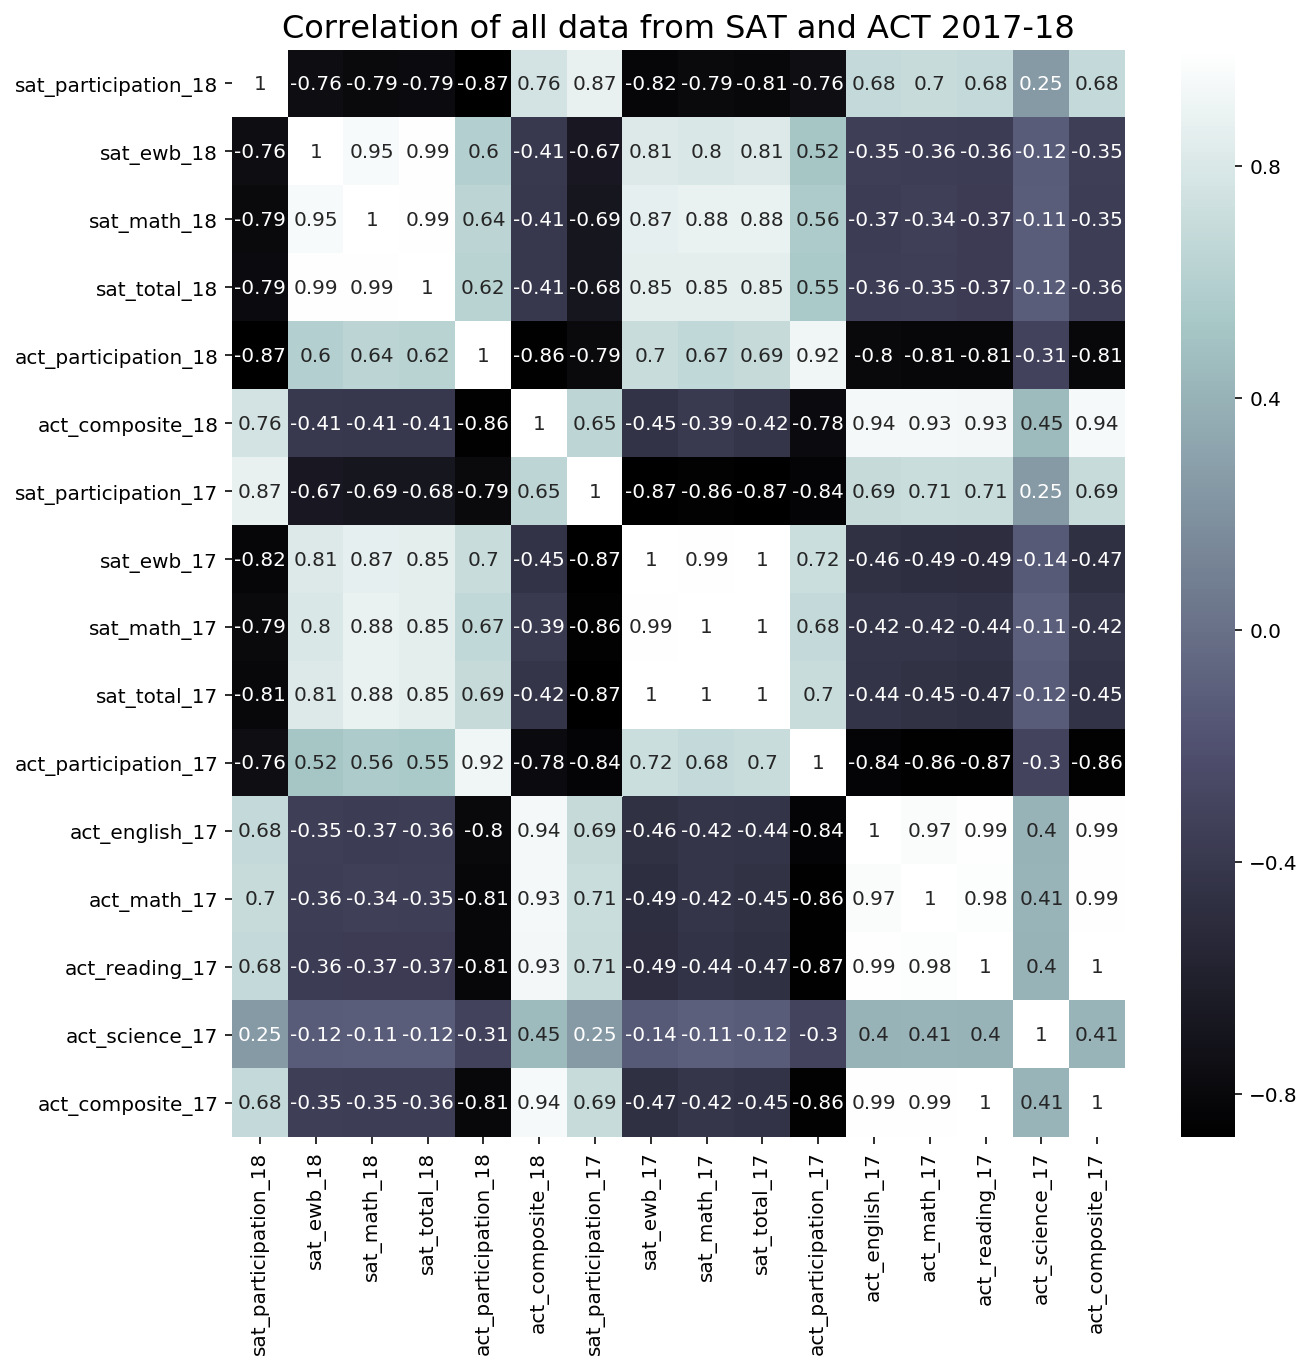

In [75]:
plt.figure(figsize=(10, 10))
plt.title('Correlation of all data from SAT and ACT 2017-18', size=16)
sns.heatmap(final_csv.corr(), annot = True, cmap = 'bone');

The correlation between test score totals and participations rates, across both test in both years, is negative. This means that the higher the participation rate, the lower the test scores.

In [76]:
# A function to create a subplot of histograms 

def subplot_histograms(dataframe, list_of_columns, list_of_titles, ylabel, xlabel, figtitle):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 10))  
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_ylabel(ylabel, fontsize = 10)
        ax[i].set_xlabel(xlabel, fontsize = 10)
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title, fontsize=12)
    fig.suptitle(figtitle, size=16) 
    plt.tight_layout()
    fig.subplots_adjust(top=.91)


In [77]:
# Create variables to intput into histogram function 

final_col = list(final_csv.columns)
final_col = ['sat_total_18','act_composite_18', 'sat_total_17','act_composite_17']
titles = ['SAT 2018 Total Scores', 'ACT 2018 Composite Scores', 'SAT 2017 Total Scores', 'ACT 2017 Composite Scores']

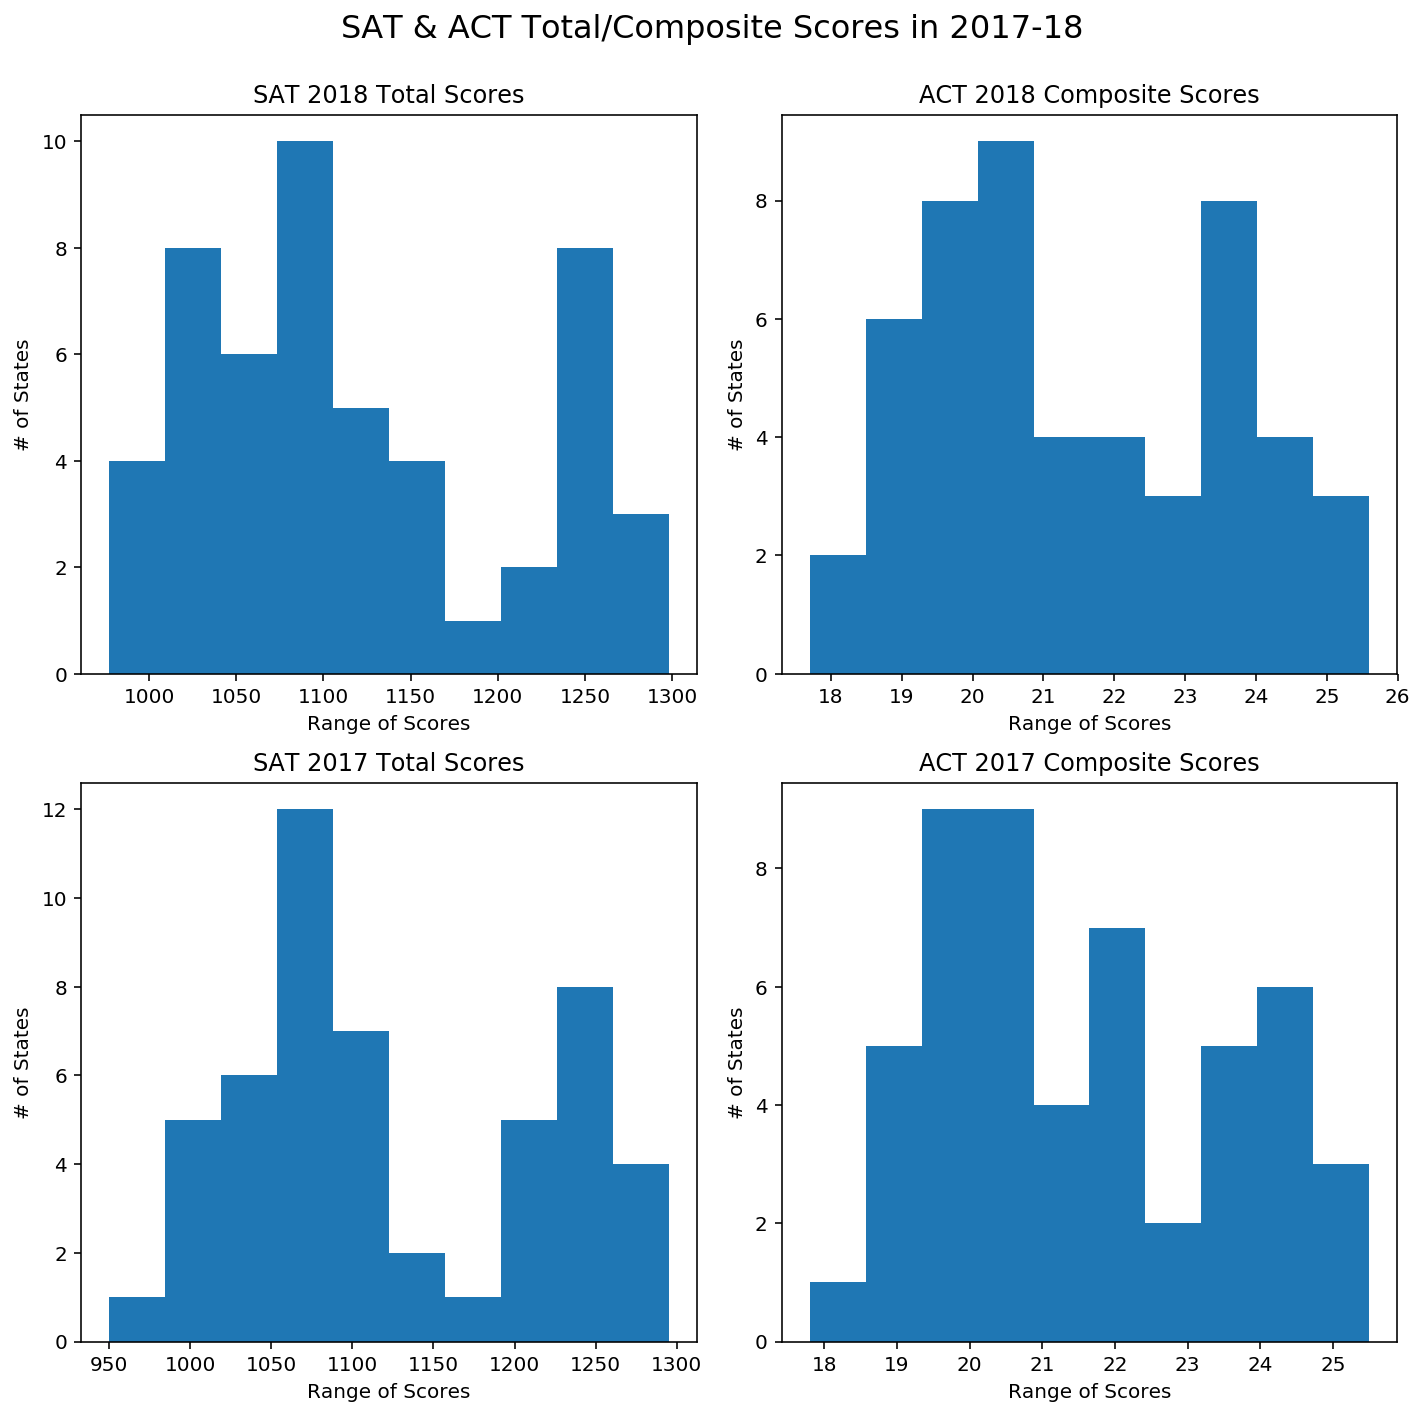

In [78]:
# SAT & ACT Total/Composite Scores in 2017 - 18

subplot_histograms(final_csv, 
                   final_col, 
                   titles, 
                   "# of States", "Range of Scores", 'SAT & ACT Total/Composite Scores in 2017-18')


The histograms are bimodal, indicating that students tend to perform either very poorly or very well.

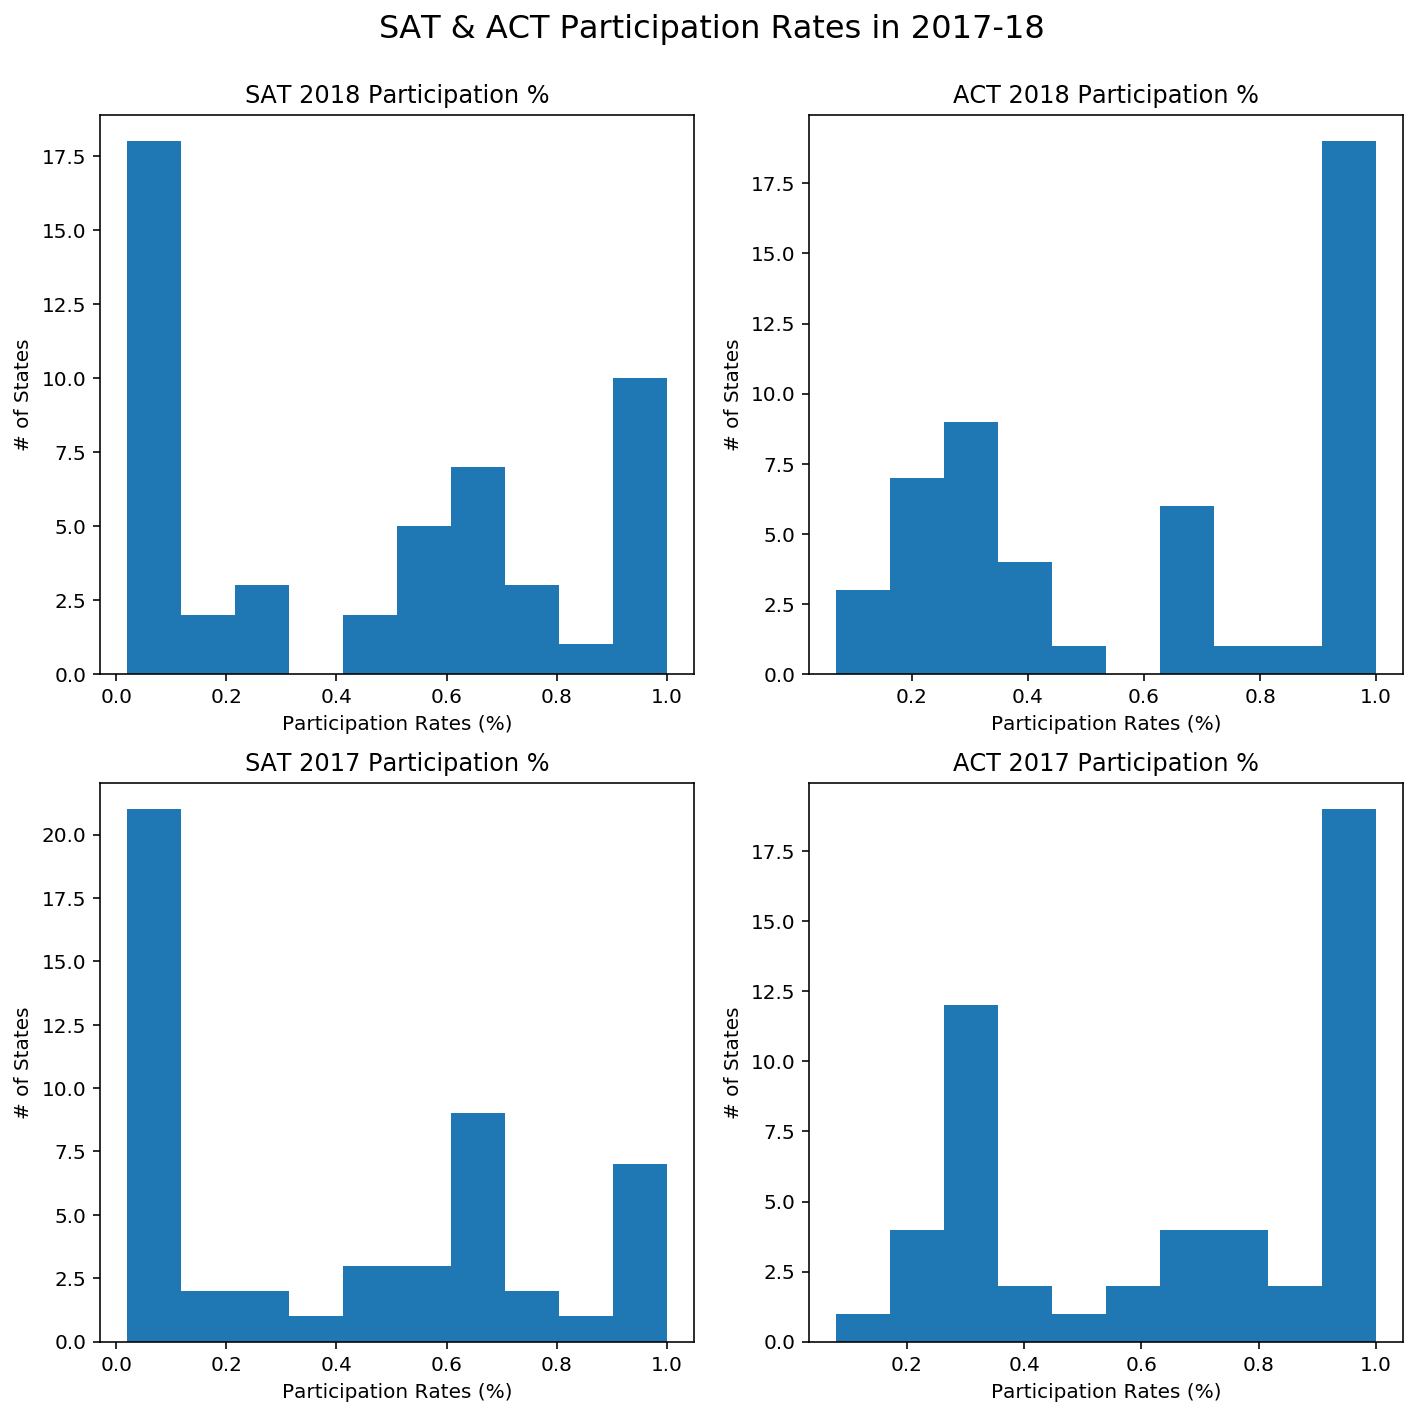

In [79]:
# Participation rates for SAT & ACT in 2017-18

participation_col = ['sat_participation_18', 'act_participation_18', 'sat_participation_17', 'act_participation_17']
participation_titles = ['SAT 2018 Participation %', 'ACT 2018 Participation %', 'SAT 2017 Participation %', 'ACT 2017 Participation %']

subplot_histograms(final_csv, participation_col, participation_titles, "# of States", "Participation Rates (%)", 'SAT & ACT Participation Rates in 2017-18')



For the SAT, there are less states that have 100% participation rate, and even more states that have a lower participation rate. The opposite is true for the ACT. 

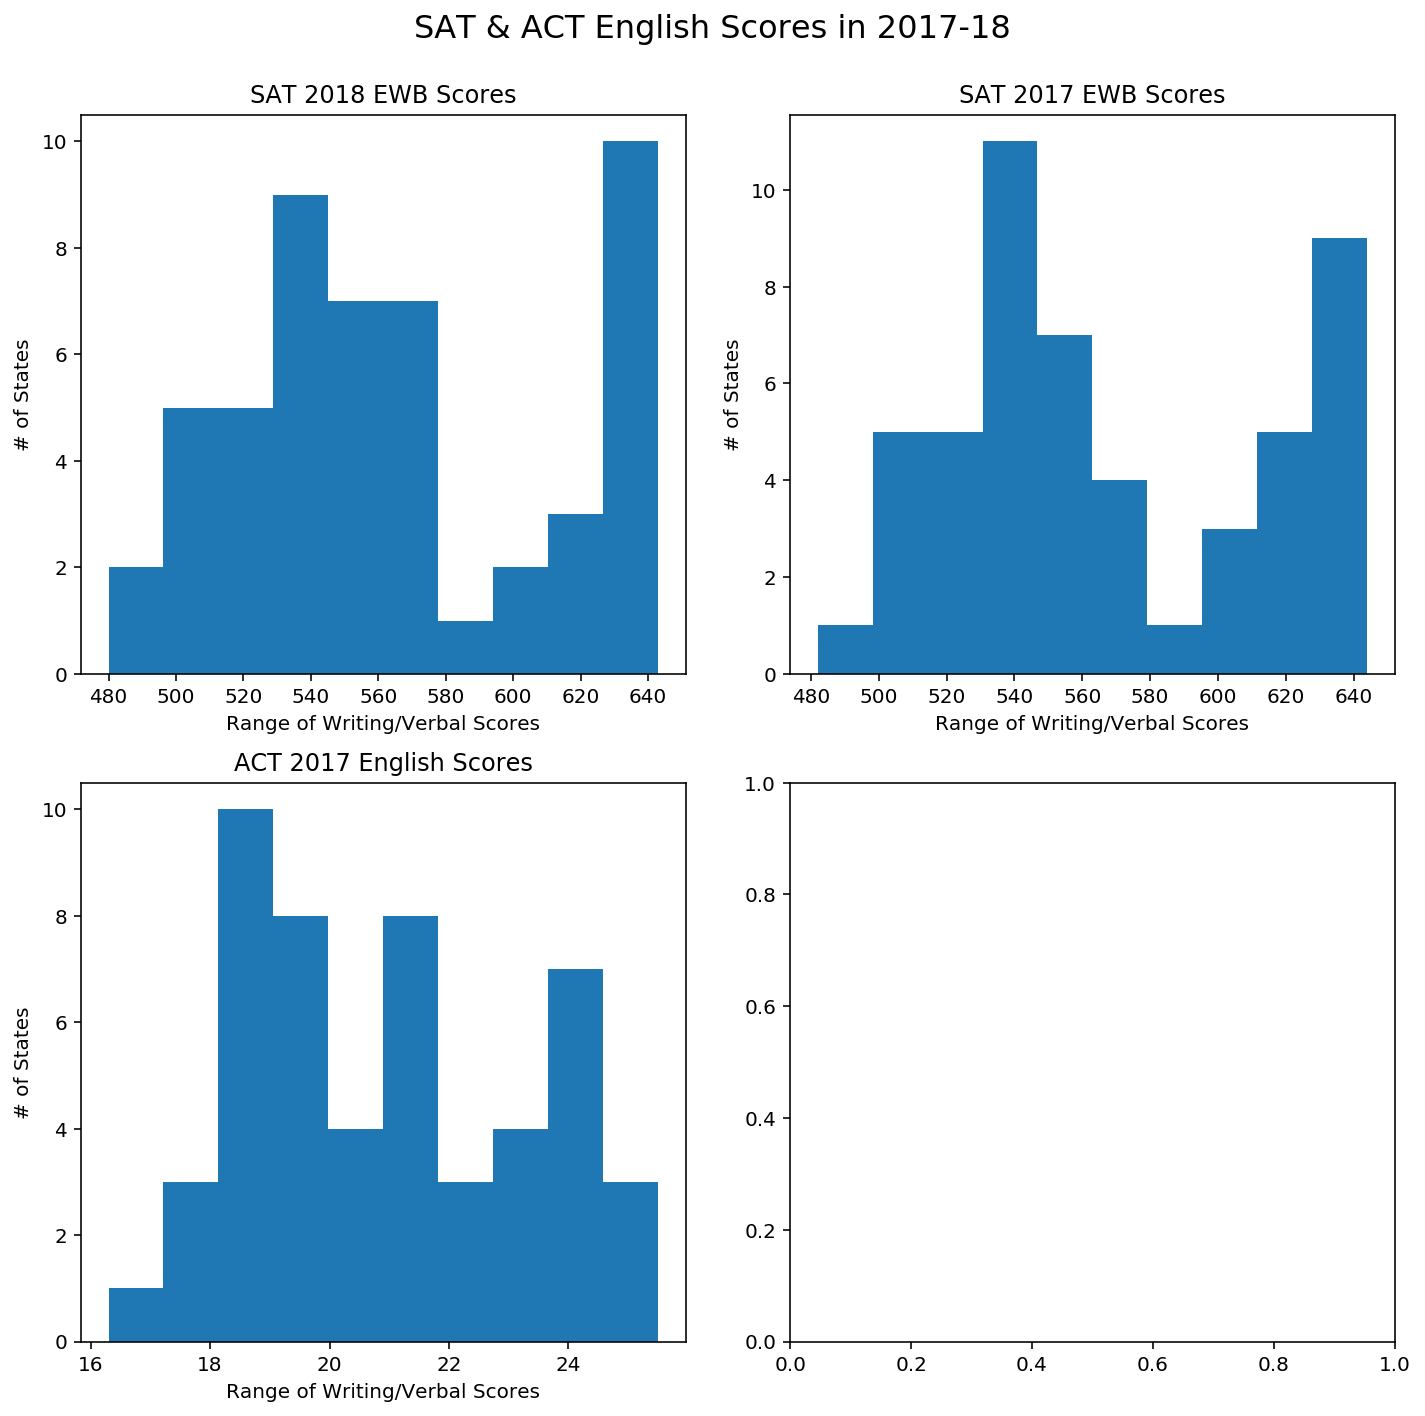

In [80]:
# Writing/Verbal scores for SAT & ACT in 2017-18

english_scores_col = ['sat_ewb_18', 'sat_ewb_17', 'act_english_17']
english_titles = ['SAT 2018 EWB Scores', 'SAT 2017 EWB Scores', 'ACT 2017 English Scores']

subplot_histograms(final_csv, english_scores_col, english_titles, "# of States", "Range of Writing/Verbal Scores", 'SAT & ACT English Scores in 2017-18')


For SAT EWB scores, the distribution is bimodal, meaning that students perform either very well or below average. The ACT distribution indicates that mode studnets perform poorly, but some students also perform average and very well.

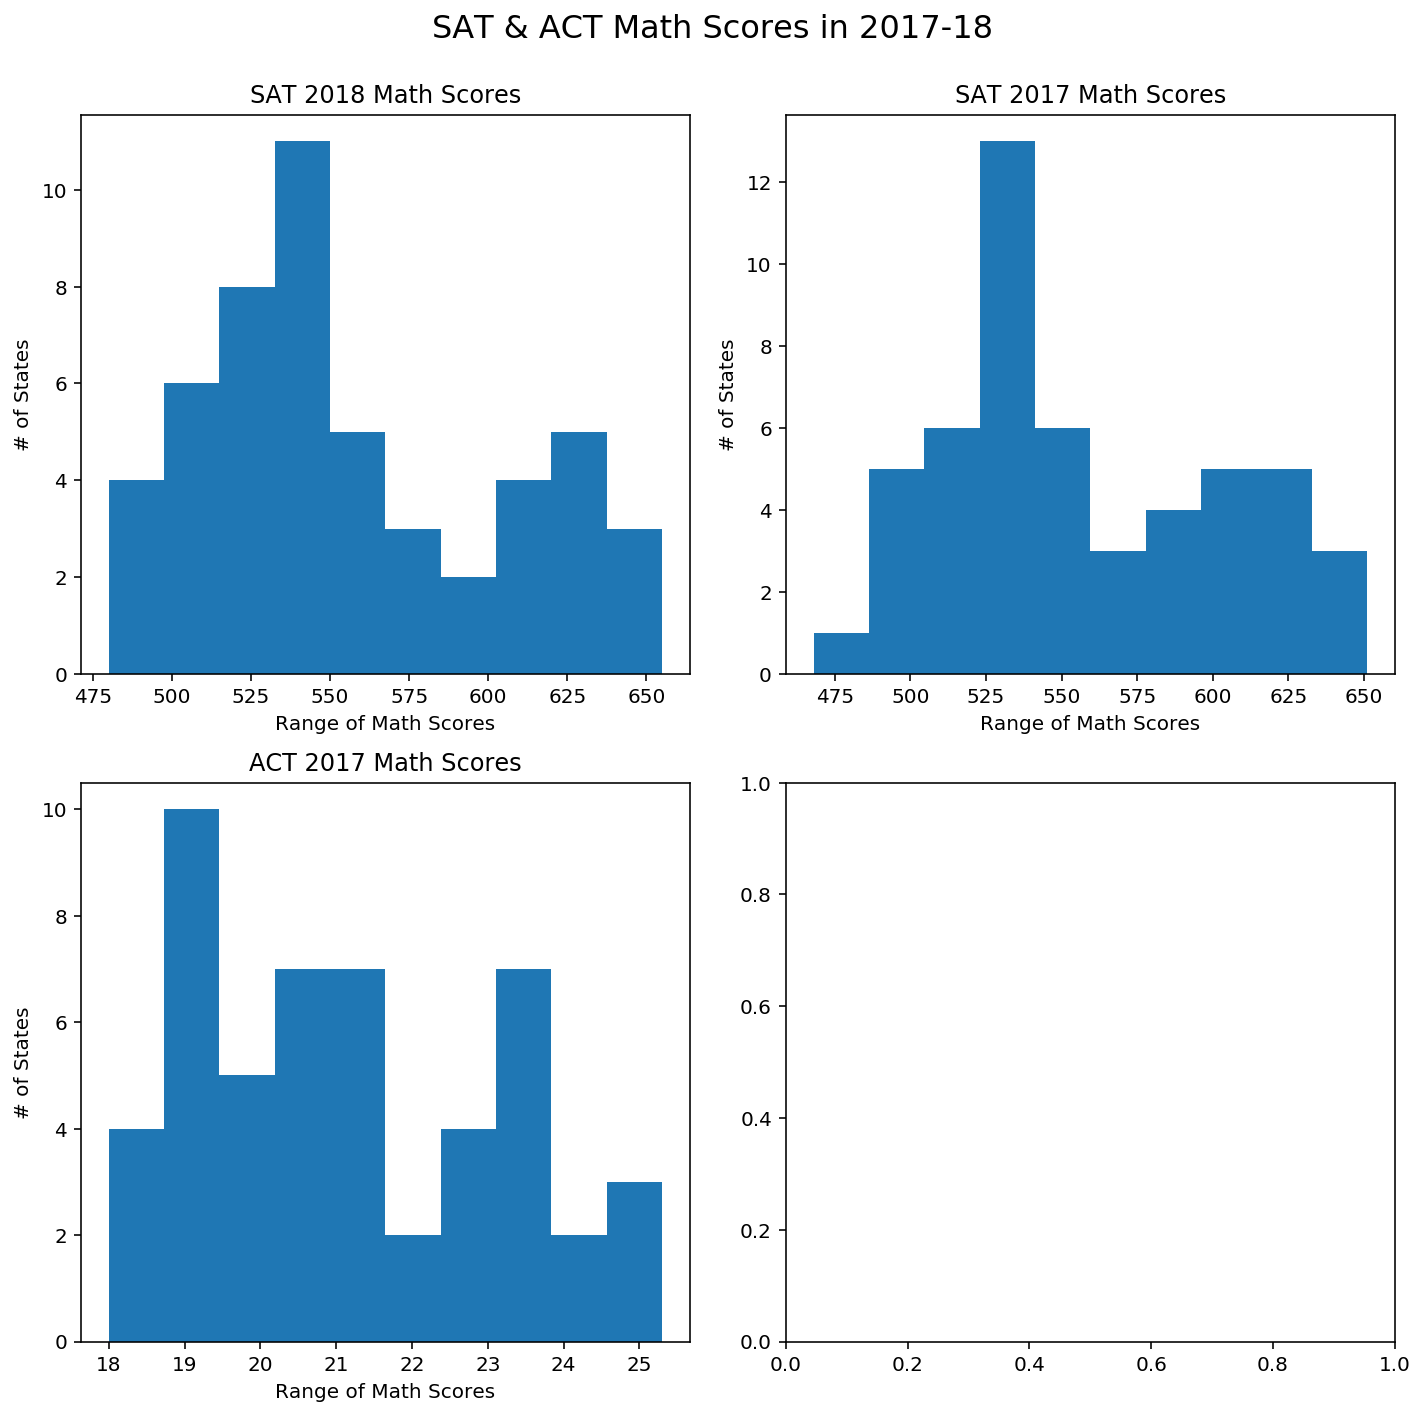

In [81]:
# Math scores for SAT & ACT in 2017-18

math_scores_col = ['sat_math_18', 'sat_math_17', 'act_math_17']
math_titles = ['SAT 2018 Math Scores', 'SAT 2017 Math Scores', 'ACT 2017 Math Scores']

subplot_histograms(final_csv, math_scores_col, math_titles, "# of States", "Range of Math Scores", 'SAT & ACT Math Scores in 2017-18')


For SAT Math scores, more students perform poorly, and only very few perform very well. The same goes for the ACT.

In [82]:
# A function to create a subplot of scatterplots 

def subplot_scatter(dataframe, list_of_columns1, list_of_columns2, list_of_titles, ylabel, xlabel, figtitle):
    nrows = int(np.ceil(len(list_of_columns1)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 14))  
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate  
    
    for i, (column1, column2) in enumerate(zip(x_axis_scatter, y_axis_scatter)):
        ax[i].scatter(dataframe[column1], dataframe[column2]) 
        ax[i].set_xlabel(xlabel[i])
        ax[i].set_ylabel(ylabel[i])
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title, fontsize=12)
    fig.suptitle(figtitle, size=16) 
    plt.tight_layout()
    fig.subplots_adjust(top=.93)

In [83]:
# Creat variables to input into the `subplot_scatter` function

x_axis_scatter = ['act_participation_17','act_participation_18','sat_participation_18','sat_participation_17', 'sat_math_17', 'sat_ewb_17', 'sat_total_17', 'sat_total_17', 'act_composite_17']
y_axis_scatter = ['act_composite_17','act_composite_18','sat_total_18','sat_total_17','act_math_17', 'act_english_17', 'act_composite_17', 'sat_total_18', 'act_composite_18']
scatter_titles = ['ACT Participation Rates vs Composite Scores in 2017','ACT Participation Rates vs Composite Scores in 2018','SAT Participation Rates vs Total Scores in 2018','SAT Participation Rates vs Total Scores in 2017','SAT vs. ACT math scores for 2017', 'SAT vs. ACT verbal/reading scores for 2017', 'SAT vs. ACT total/composite scores for 2017', 'Total scores for SAT 2017 vs. 2018', 'Composite scores for ACT 2017 vs. 2018']
x_axis_labels = ['Participation Rates (0%-100%)','Participation Rates (0%-100%)','Participation Rates (0%-100%)','Participation Rates (0%-100%)','SAT Math 2017', 'SAT EWB 2017', 'SAT Total 2017', 'SAT Total 2017', 'ACT Composite 2017']
y_axis_slabels = ['Composite Scores (1-36)','Composite Scores (1-36)','Total Scores (400-600)','Total Scores (400-600)','ACT Math 2017', 'ACT English 2017', 'ACT Composite 2017', 'ACT Total 2018', 'ACT Composite 2018']

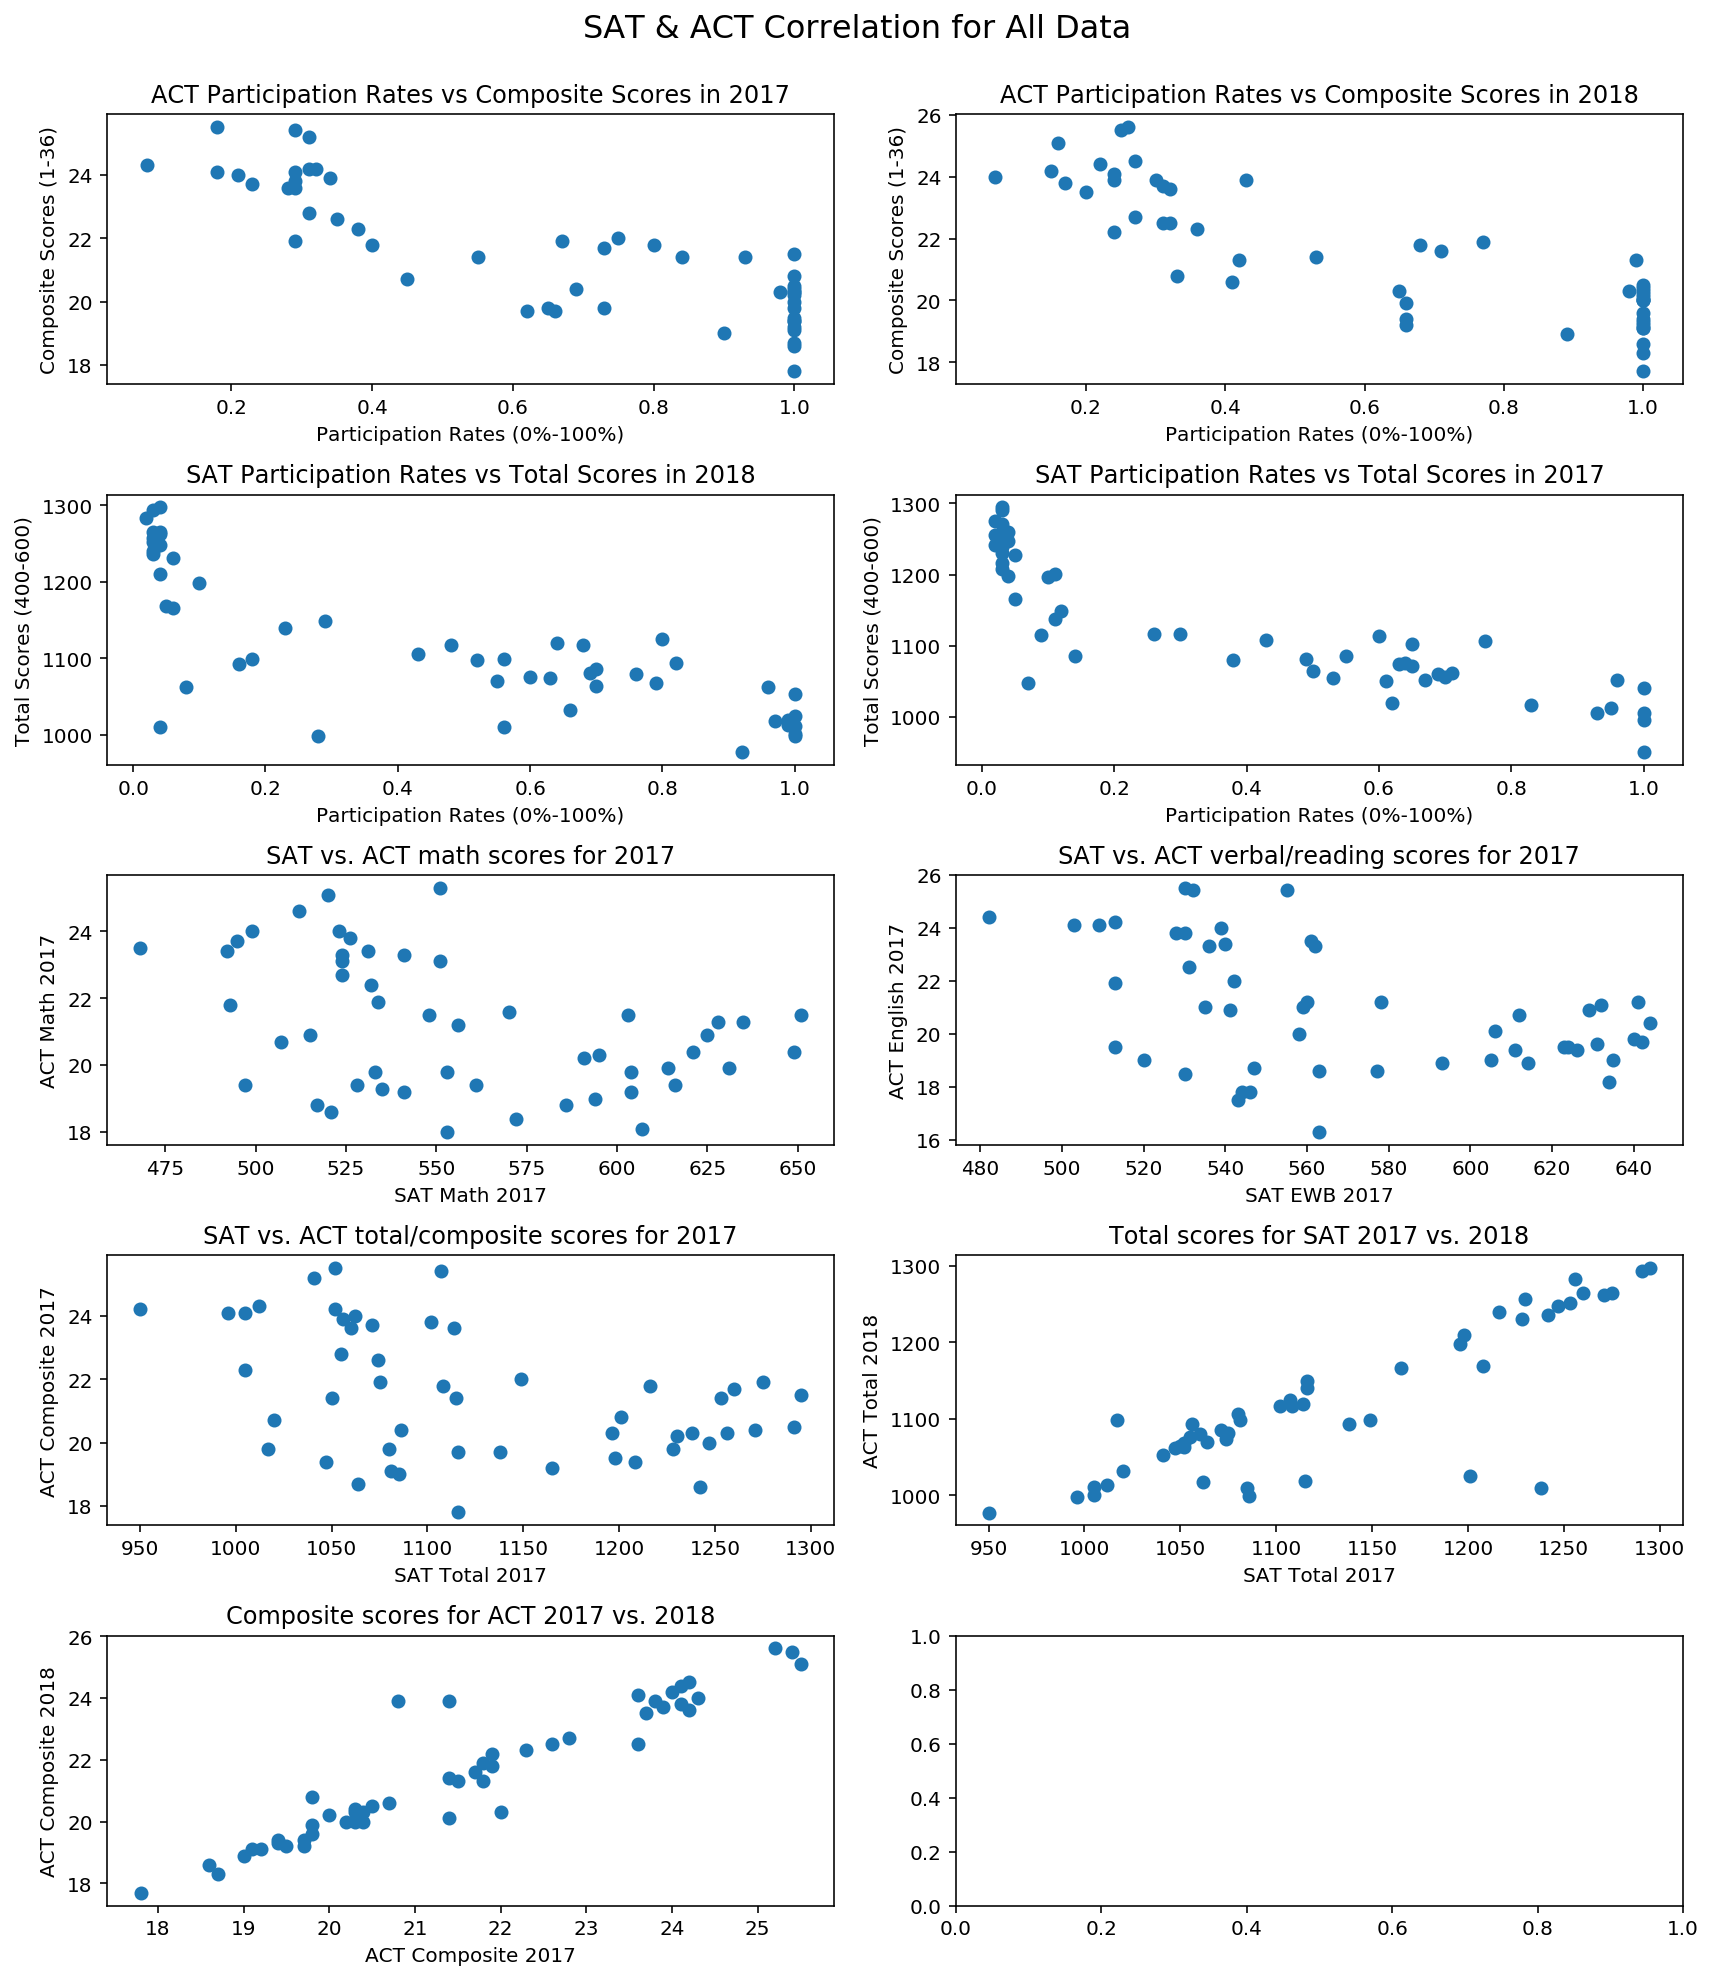

In [84]:
# ACT & SAT Correlation for All Data
subplot_scatter(final_csv, x_axis_scatter, y_axis_scatter, scatter_titles, y_axis_slabels, x_axis_labels, 'SAT & ACT Correlation for All Data')


One of the most significant takeaways from these scatterplots is witnessing a negative correlation between participation rates and test score performance. 

In [85]:
# A function to create a subplot of comparative boxplots 

def subplot_boxplot(dataframe, box_1, box_2, list_of_titles, box_1_titles, box_2_titles, figtitle):
    nrows = int(np.ceil(len(box_1)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 13))  
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate  
    
    for i, (boxplot_1, boxplot_2) in enumerate(zip(box_1, box_2)):
        ax[i].boxplot([dataframe[boxplot_1],dataframe[boxplot_2]], widths=.7, labels = [box_1_titles[i], box_2_titles[i]] ) 
        for i, title in enumerate(list_of_titles):
             ax[i].set_title(title, fontsize=12)
    fig.suptitle(figtitle, size=16) 
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    fig.subplots_adjust(top=.93)


In [86]:
# Create variables to input into boxplot function 

box_1_list = ['act_composite_17', 'sat_total_17', 'act_participation_17', 'sat_participation_17', 'sat_math_17', 'sat_ewb_17' ]
box_1_titles = ['ACT Composite 2017', 'SAT Total 2017', 'ACT Participation 2017', 'SAT Participation 2017', 'SAT Math 2017', 'SAT EWB 2017']
box_2_list = ['act_composite_18', 'sat_total_18', 'act_participation_18', 'sat_participation_18', 'sat_math_18', 'sat_ewb_18']
box_2_titles = ['ACT Composite 2018', 'SAT Total 2018', 'ACT Participation 2018', 'SAT Participation 2018', 'SAT Math 2018', 'SAT EWB 2018']
box_titles = ['ACT Compositive 2017 vs 2018', 'SAT Total 2017 vs 2018', 'ACT Participation 2017 vs 2018', 'SAT Participation 2017 vs 2018', 'SAT Math 2017 vs 2018', 'SAT English 2017 vs 2018']

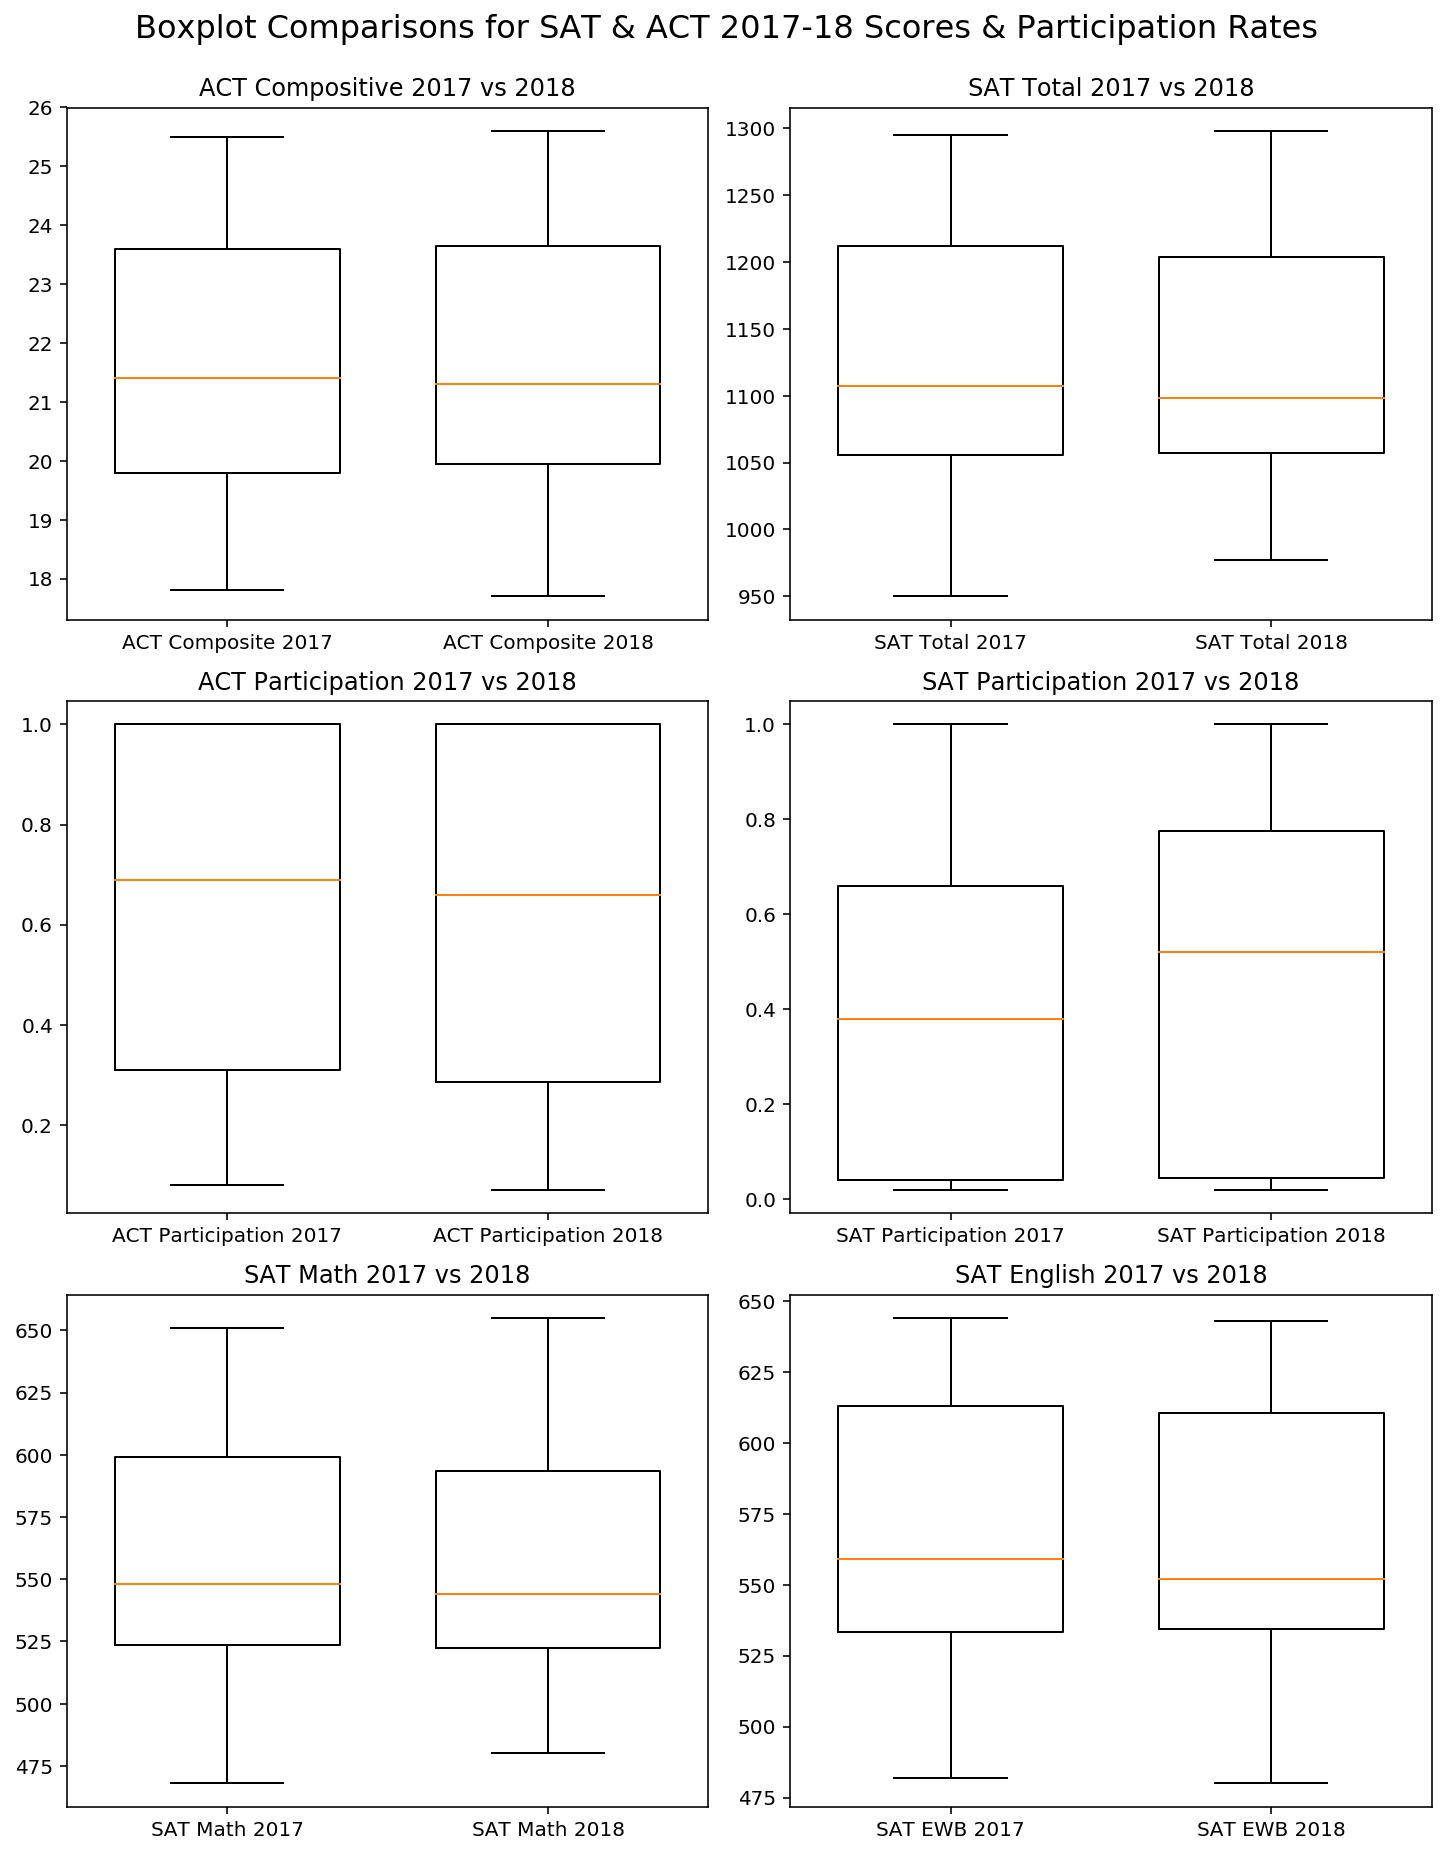

In [87]:
# Boxplot Comparisons for SAT & ACT 2017-18 Scores & Participation Rates 

subplot_boxplot(final_csv, box_1_list, box_2_list, box_titles, box_1_titles, box_2_titles, 'Boxplot Comparisons for SAT & ACT 2017-18 Scores & Participation Rates')


In [88]:
# Create variables to input into a Folium map (see below)

states_long_lat = pd.read_csv('./data/states_long_late.csv')

In [89]:
# Create lists of data to input into the maps below. 

longitude = list(states_long_lat['Long'])

latitude = list(states_long_lat['Lat'])

states = list(states_long_lat['State'])

sat_2018_scores = list(final_csv['sat_total_18'])

sat_2018_part = list(final_csv['sat_participation_18'])

In [90]:
# Mean total score of the nation. 

sum(sat_2018_scores)/len(sat_2018_scores)

1120.0196078431372

In [91]:
# Code modified from https://python-graph-gallery.com/313-bubble-map-with-folium/  
# This map shows the correlation between SAT test scores and participation rates in 2018. 
# When a state's mean total score is less than the mean total score of the nation (1120) and the participation rate is above 50%, then the bubble is red.
# When a state's mean total score is above  the mean total score of the nation (1120) and the participation rate is below 50%, then the bubble is green.
# Bubble sizes correspond to test scores. 

map_2018 = pd.DataFrame({
   'lat':latitude,
   'lon':longitude,
   'name':states,
   'value':sat_2018_scores,
   'participation':sat_2018_part
})
map_2018
 
# Make an empty map
m = folium.Map(location=[37, -96], tiles="Mapbox Bright", zoom_start=4)
 
# I can add marker one by one on the map
for i, (scores, part_rate) in enumerate(zip(map_2018['value'], map_2018['participation'])):    
    if (map_2018['value'][i] <= 1120) & (map_2018['participation'][i] >= .5):  
        folium.Circle(
            location=[map_2018.iloc[i]['lon'], map_2018.iloc[i]['lat']],
            popup=str(list(map_2018.iloc[i][['name', 'value', 'participation']])),
            radius=int(map_2018.iloc[i]['value']*70),
            color='crimson',
            fill=True,
            fill_color='crimson'
        ).add_to(m)
    else:
        folium.Circle(
            location=[map_2018.iloc[i]['lon'], map_2018.iloc[i]['lat']],
            popup=str(list(map_2018.iloc[i][['name', 'value', 'participation']])),
            radius=int(map_2018.iloc[i]['value']*70),
            color='green',
            fill=True,
            fill_color='green'
        ).add_to(m)
 

m.save('./maps/sat2018_participation_scores_corr_map.html')
m

***View real map when downloaded***
![title](./maps/map1_sat18_corr.png)

This map shows the correlation between SAT test scores and participation rates in 2018. When a state's mean total score is less than the mean total score of the nation (1120) and the participation rate is above 50%, then the bubble is red. When a state's mean total score is above  the mean total score of the nation (1120) and the participation rate is below 50%, then the bubble is green. Bubble sizes correspond to test scores.

In [92]:
# Code modified from https://python-graph-gallery.com/313-bubble-map-with-folium/
# This map shows SAT test scores in 2018. 
# When a state's mean total score is less than the mean total score of the nation (1120), then the bubble is red.
# When a state's mean total score is above  the mean total score of the nation (1120), then the bubble is green.
# Bubble sizes correspond to test scores. 

map_2018 = pd.DataFrame({
   'lat':latitude,
   'lon':longitude,
   'name':states,
   'value':sat_2018_scores
})
map_2018

# Make an empty map
m1 = folium.Map(location=[37, -96], tiles="Mapbox Bright", zoom_start=4)
 
# I can add marker one by one on the map
for i, scores in enumerate(map_2018['value']): 
    if map_2018['value'][i] <= 1120:  
        folium.Circle(
            location=[map_2018.iloc[i]['lon'], map_2018.iloc[i]['lat']],
            popup=str(list(map_2018.iloc[i][['name', 'value']])),
            radius=int(map_2018.iloc[i]['value']*70),
            color='crimson',
            fill=True,
            fill_color='crimson'
        ).add_to(m1)
    else:
        folium.Circle(
            location=[map_2018.iloc[i]['lon'], map_2018.iloc[i]['lat']],
            popup=str(list(map_2018.iloc[i][['name', 'value']])),
            radius=int(map_2018.iloc[i]['value']*70),
            color='green',
            fill=True,
            fill_color='green'
        ).add_to(m1)
 

m1.save('./maps/sat2018_high_low_scores_map.html')
m1

***View real map when downloaded***
![title](./maps/map2_sat18_scores.png)

This map shows SAT test scores in 2018. When a state's mean total score is less than the mean total score of the nation (1120), then the bubble is red. When a state's mean total score is above  the mean total score of the nation (1120), then the bubble is green. Bubble sizes correspond to test scores. 

In [93]:
# Save States and SAT 2018 Scores to new variable. 
state_sat_total = final_csv[['state', 'sat_total_18']]


In [94]:
# Change all states to abbrevs. 

states = ['AL','AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

state_sat_total.insert(0, 'states', states)

In [95]:
# Drop the column with the full state name 

#state_sat_total.drop(columns=['state'], inplace=True)
state_sat_total.drop('state', axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [96]:
# Convert DataFrame to CSV (went into the csv and manually changed state names to abbrevs.)
state_sat_total.to_csv(r'./data/state_sat_total_18.csv',index=False)


In [97]:
# Code modified from https://python-graph-gallery.com/292-choropleth-map-with-folium/
# This map shows the total SAT scores in 2018 for each state.

# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('./maps', 'us-states.json')
 

state_sat = os.path.join('./data', 'state_sat_total_18.csv')
state_data = pd.read_csv(state_sat)
 
# Initialize the map:
m2 = folium.Map(location=[37, -96], zoom_start=4)
 
# Add the color for the chloropleth:
folium.Choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['states', 'sat_total_18'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='SAT Total Scores'
).add_to(m2)
folium.LayerControl().add_to(m2)
 
# Save to html
m2.save('./maps/sat18_totalscores_map.html')
m2

***View real map when downloaded***
![title](./maps/map3_sat18_scores_choropleth.png)

This map shows the total SAT scores in 2018 for each state. States in the midwest tend to perform better on the SAT than the rest of the US, however, their participation rates are among the lowest. 

## Descriptive and Inferential Statistics

#### The SAT and ACT datasets did not display normal distributions. 
- Across the board for participation rates and test scores, the distributions of the data tended to be bimodal or non-normal. That is, a majority of the data appeared at opposite ends of the distribution. For example, when observing the distribution of average SAT scores, students tended to perform either very poorly or very well. This is in contrast to a normal distribution where less students would have performed either very poorly or very well, and more students would have performed mediocrely. 

Let's take a closer look at the distriburions for Math and Reading scores, and Participation Rates for both tests in both years. 
- **Math**: In Math scores for both the SAT and ACT, students tended to perform very poorly. The distribution of scores are right skewed, meaning that a majority of the data appears on the left side of the distribution where the score range is lower. The range for Math scores in the SAT is 200 - 800. For students in the US, the maximum Math score achieved in 2017 was 651 and in 2018 was 655. Students performed closer to the minimum score than the maximum score. 
<br>
<br>
- **Reading**: In the Reading scores for the SAT in both years, the distribution of the data is bimodal. That is, students tended to perform either very poorly or very well. On the other hand, the ACT English scores in 2017 appears to be more evenly distributed but slightly skewed to the left. More students performed mediocrely, and only a few students performed very well and fewer performed very poorly. 
<br>
<br>
- **Participation Rates**: The distributions of the participation rates for the SAT in both years is bimodal, with a tendency for participation rates to be the far low end of the participation rates. A majority of states experienced extremely low participation rates on the SAT, and a few experienced extremely high participation rates. In contracts, the distribution of participation for the ACT in both years was also bimodal, but there were much more states that experienced higher participation rates than lower. 

**It does not make sense to conduct statistical inference** given these data specifically. The datasets for both tests provides data for all students in all states (and DC). Therefore, we are analyzing a population and not a sample. Statistical inference is conducted only when the data is a sampling of the population.

In [98]:
#create new variable for final_csv.describe 
final_stats = final_csv.describe()

final_stats.describe().round(2)

,sat_participation_18,sat_ewb_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,sat_participation_17,sat_ewb_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
count,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00
mean,6.77,435.27,431.25,862.46,6.87,22.85,6.73,437.16,430.56,861.14,6.88,22.39,22.61,23.20,20.80,22.83
std,17.87,243.15,241.15,496.86,17.83,13.47,17.89,244.84,241.38,497.82,17.83,13.54,13.50,13.44,15.05,13.48
min,0.02,47.50,47.77,51.00,0.07,2.12,0.02,45.67,47.12,51.00,0.08,2.35,1.98,2.07,2.30,2.02
25%,0.29,372.75,372.75,756.29,0.33,19.39,0.27,374.25,363.75,735.62,0.32,18.32,19.05,19.86,15.72,19.30
50%,0.49,543.25,533.25,1077.75,0.64,21.40,0.39,546.25,535.75,1081.25,0.67,20.82,21.04,21.91,21.17,21.46
75%,0.83,575.39,565.55,1141.01,1.00,24.14,0.74,580.09,567.41,1147.57,1.00,23.85,23.65,24.61,23.29,24.08
max,51.00,643.00,655.00,1298.00,51.00,51.00,51.00,644.00,651.00,1295.00,51.00,51.00,51.00,51.00,51.00,51.00


## External Research

In 2018, 2.1 million students from the class of 2018 took the SAT -- the highest ever.$^{1}$ In fact, there was a 27% increase in participation rates from the previous year.$^{2}$ SAT participation rates are so high that as of 2018, the test holds the title for "most widely used college admission test," beating the ACT where 1.91 million students took that test in the same year.$^{3}$  While the SAT can boast of this achievement, the data shows that there is a negative correlation between participation rates and test scores. That is, the higher the participation rate amongst all states and DC, the lower the average student test scores. This is alarming considering that high SAT scores are demanded by most universities and colleges. Contrary to the College Board's claim that the SAT offers "greater access and opportunity" for students who take their test, the more widely their test is offered, the higher the chances are of more students performing poorly. One notable example is Washington, DC, where students had among the highest participation rates of all states in 2017 - 2018, but earned the lowest test scores. Conversely, Minnesota had participation rates in the bottom 10 on a national scale in 2017-18, but earned the highest test scores. Taking a closer look at test scores, students were either performed very poorly or very well. But there were more students who performed poorly than well. If taking the SAT is a significant contributor to college acceptance, the SAT itself is posing a burden to students' access to college. Instead of focusing on increasing participation rates, the SAT show focus more test prep materials.  

Citations
<br>
1: https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever
<br>
2: https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html
<br>
3: https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/?utm_term=.c1ca18b8b596

## Conclusions and Recommendations

The College Board focusing on increasing participation rates is equivalent to the College Board assisting in  deterioration of test scores. There is a distinct negative correlation between participation rates and test scores, where the higher the participation rates, the lower the test scores (and vice versa). If the College Board decides to focus solely on increasing participation rates, thereby achieving an ideal of a 100% participation rate, a majority of US high schoolers will perform very poorly on the test.  
<br>
**Recommendations**
<br>
Therefore in order to achieve sustainable growth and be a resource trusted by students nationwide (i.e., its primary customers), I recommend the following:  
- Shift focus away from participation and more towards improving access to test prep resources. 
- Create better test prep material for states with highest participation rates, particularly in the East Coast where there is a concentration of states with high performance and low test scores. 